In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\KIIT\Desktop\all\project\Complete-data.csv')

df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [3]:
df.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [5]:
df.isnull().sum()

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
dtype: int64

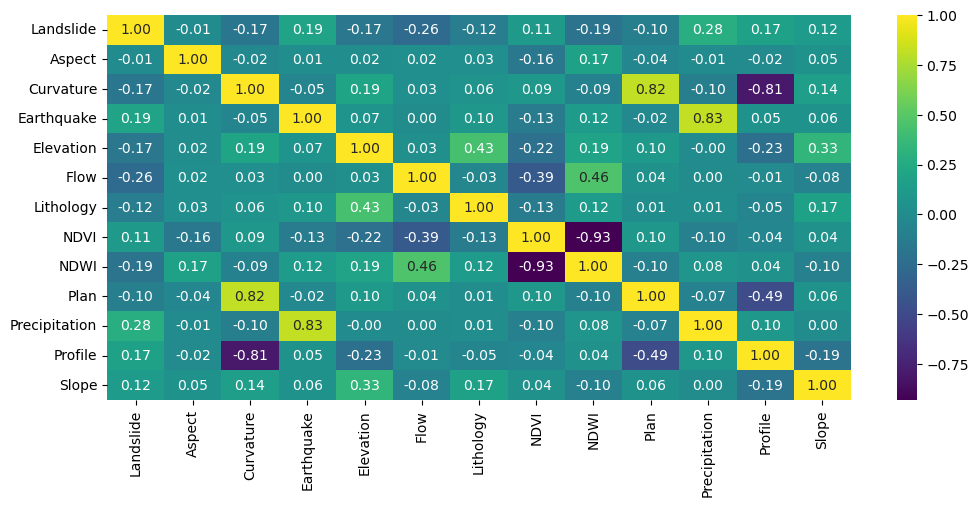

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()


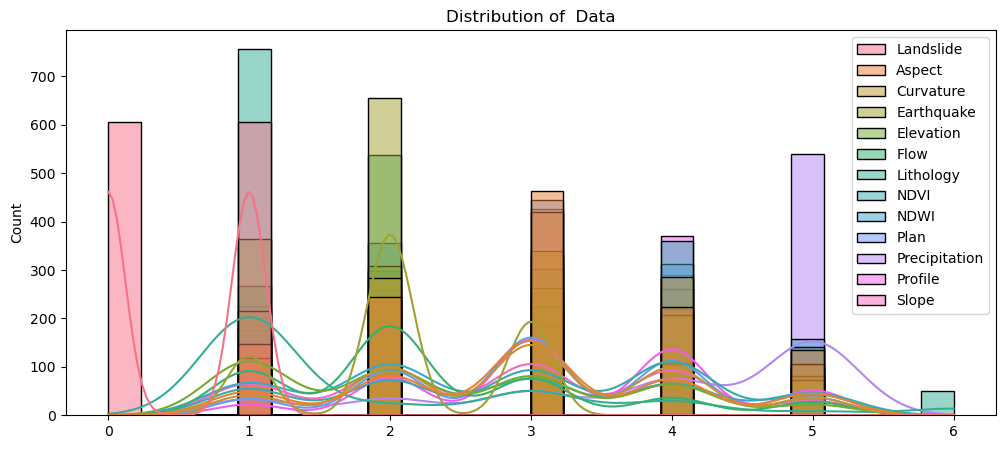

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(df, kde=True)
plt.title('Distribution of  Data')
plt.show()

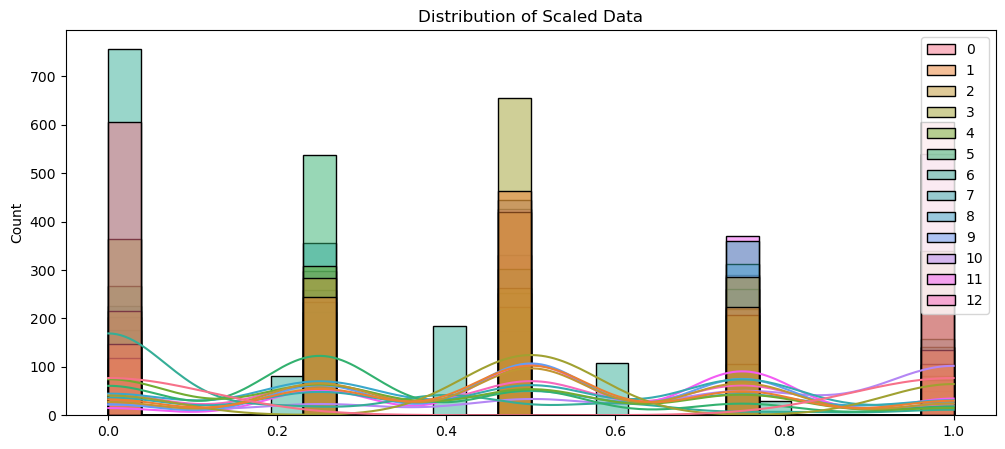

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

plt.figure(figsize=(12, 5))
sns.histplot(df_scaled, kde=True)
plt.title('Distribution of Scaled Data')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Landslide', axis=1)
y = df['Landslide']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'{name}: Accuracy = {accuracy}')

Logistic Regression: Accuracy = 0.720164609053498
Decision Tree: Accuracy = 0.6707818930041153
Random Forest: Accuracy = 0.7777777777777778
Support Vector Machine: Accuracy = 0.7901234567901234
K-Nearest Neighbors: Accuracy = 0.7160493827160493


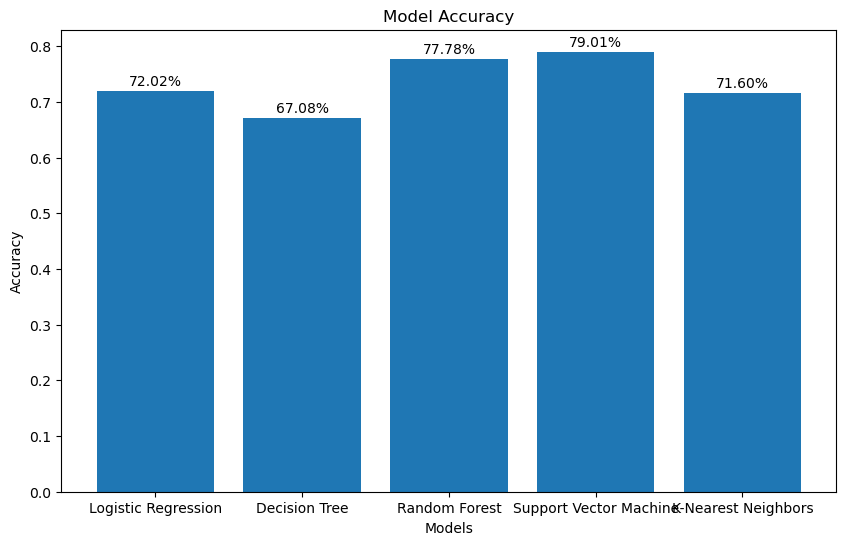

In [10]:
import matplotlib.pyplot as plt

accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}


plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')


for i, v in enumerate(accuracies.values()):
  plt.text(i, v + 0.01, f'{v:.2%}', ha='center')

plt.show()


Logistic Regression: Best parameters = {'C': 0.1}, Best accuracy = 0.7523155814326158
Decision Tree: Best parameters = {'max_depth': 5, 'min_samples_split': 2}, Best accuracy = 0.7471876502323594
Random Forest: Best parameters = {'max_depth': 10, 'n_estimators': 200}, Best accuracy = 0.7998237273649912
Support Vector Machine: Best parameters = {'C': 1, 'kernel': 'rbf'}, Best accuracy = 0.7915495967095774
K-Nearest Neighbors: Best parameters = {'n_neighbors': 7}, Best accuracy = 0.775060092943753
Logistic Regression: Tuned Accuracy = 0.7283950617283951
Decision Tree: Tuned Accuracy = 0.7119341563786008
Random Forest: Tuned Accuracy = 0.7860082304526749
Support Vector Machine: Tuned Accuracy = 0.7901234567901234
K-Nearest Neighbors: Tuned Accuracy = 0.7037037037037037


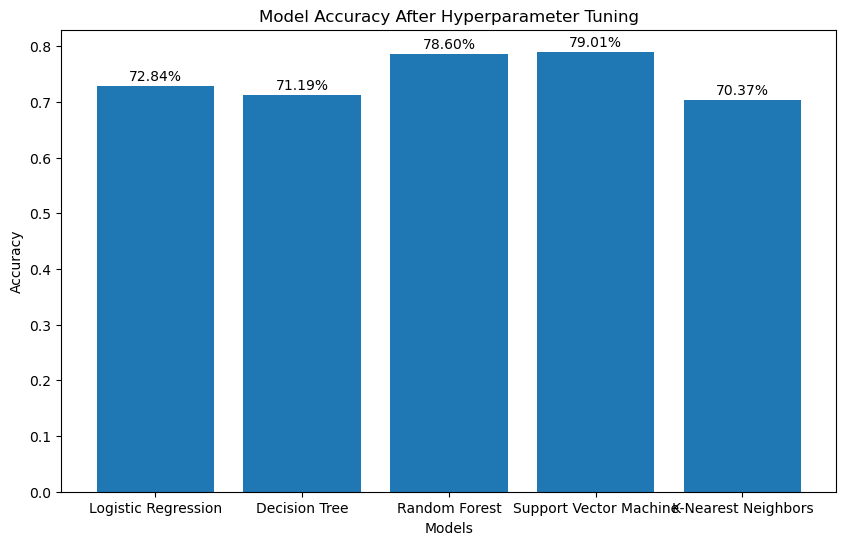

In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'{name}: Best parameters = {grid_search.best_params_}, Best accuracy = {grid_search.best_score_}')

# Evaluate the best models on the test set
tuned_accuracies = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_accuracies[name] = accuracy
    print(f'{name}: Tuned Accuracy = {accuracy}')

# Visualize the tuned accuracies
plt.figure(figsize=(10, 6))
plt.bar(tuned_accuracies.keys(), tuned_accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy After Hyperparameter Tuning')

for i, v in enumerate(tuned_accuracies.values()):
  plt.text(i, v + 0.01, f'{v:.2%}', ha='center')

plt.show()


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

Logistic Regression: Best parameters = {'C': 0.1, 'penalty': 'l2'}, Best accuracy = 0.7523155814326158
Decision Tree: Best parameters = {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}, Best accuracy = 0.74719833342236
Random Forest: Best parameters = {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}, Best accuracy = 0.7998237273649911
Support Vector Machine: Best parameters = {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}, Best accuracy = 0.7967202606698361
K-Nearest Neighbors: Best parameters = {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'uniform'}, Best accuracy = 0.7791944874739597
Logistic Regression: Tuned Accuracy = 0.7283950617283951
Decision Tree: Tuned Accuracy = 0.7037037037037037
Random Forest: Tuned Accuracy = 0.8024691358024691
Support Vector Machine: Tuned Accuracy = 0.7818930041152263
K-Nearest Neighbors: Tuned Accuracy = 0.720164609053498


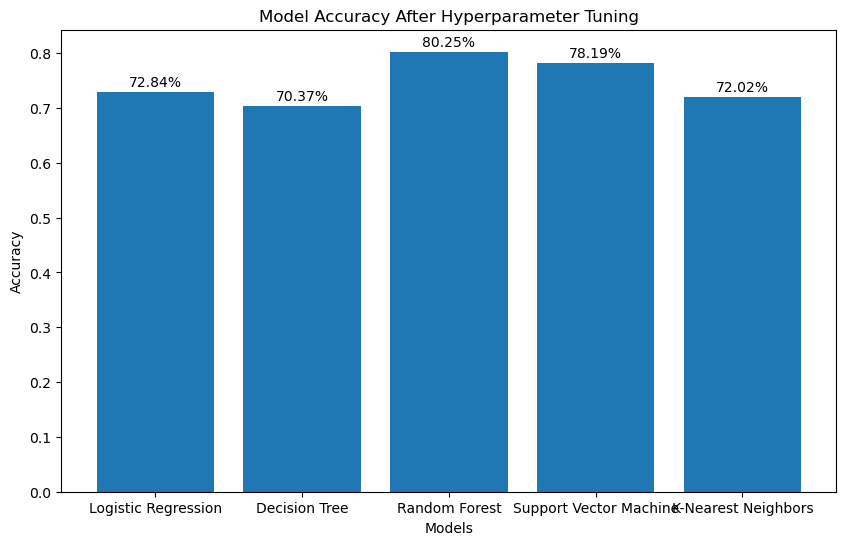

In [12]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Decision Tree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15], 'criterion': ['gini', 'entropy']},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'{name}: Best parameters = {grid_search.best_params_}, Best accuracy = {grid_search.best_score_}')

# Evaluate the best models on the test set
tuned_accuracies = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_accuracies[name] = accuracy
    print(f'{name}: Tuned Accuracy = {accuracy}')

# Visualize the tuned accuracies
plt.figure(figsize=(10, 6))
plt.bar(tuned_accuracies.keys(), tuned_accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy After Hyperparameter Tuning')

for i, v in enumerate(tuned_accuracies.values()):
  plt.text(i, v + 0.01, f'{v:.2%}', ha='center')

plt.show()

In [15]:
# prompt: apply regularization to boost the algorithm

from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet

# Assuming X_train, X_test, y_train, y_test are already defined

# Ridge Regression
ridge_model = RidgeClassifier(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_accuracy = accuracy_score(y_test, ridge_pred)
print(f'Ridge Regression Accuracy: {ridge_accuracy}')

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
# Fit Lasso model only if your target variable is continuous.
# lasso_model.fit(X_train, y_train)
# lasso_pred = lasso_model.predict(X_test)
# lasso_accuracy = accuracy_score(y_test, lasso_pred)
# print(f'Lasso Regression Accuracy: {lasso_accuracy}')

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio
# Fit Elastic Net model only if your target variable is continuous.
# elastic_net_model.fit(X_train, y_train)
# elastic_net_pred = elastic_net_model.predict(X_test)
# elastic_net_accuracy = accuracy_score(y_test, elastic_net_pred)
# print(f'Elastic Net Regression Accuracy: {elastic_net_accuracy}')


Ridge Regression Accuracy: 0.7283950617283951
